In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read the csv file and checking the first five observation

In [3]:
df = pd.read_csv('coalv2.csv')
df.head()

,moistr,volmat,fixedc,ash,hydrgn,carbon,nitrgn,oxygen,sulfur,gcv
0,6.98,33.02,57.42,2.58,5.14,71.80,1.13,18.91,0.44,12312
1,11.15,26.39,58.32,4.14,5.05,66.71,1.40,22.10,0.60,11290
2,2.38,29.88,54.64,13.10,4.66,69.69,1.25,6.07,5.23,12674
3,3.38,28.61,40.39,27.62,4.30,55.02,1.15,6.78,5.13,10130
4,10.67,27.92,54.50,6.91,5.43,70.17,1.54,14.80,1.15,12559


In [4]:
df = df.iloc[:5000, ]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   moistr  5000 non-null   float64
 1   volmat  5000 non-null   float64
 2   fixedc  5000 non-null   float64
 3   ash     5000 non-null   float64
 4   hydrgn  5000 non-null   float64
 5   carbon  5000 non-null   float64
 6   nitrgn  5000 non-null   float64
 7   oxygen  5000 non-null   float64
 8   sulfur  5000 non-null   float64
 9   gcv     5000 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 390.8 KB


In [5]:
# selecting features and label
X = df.iloc[:, :-1]  # features
y = df.iloc[:,-1]  #label

In [6]:
[X.shape, y.shape]

[(5000, 9), (5000,)]

###  Split into train and test set
___
###  Standardization:
$$x^{'} = \frac{x - \bar{x}}{\sigma}$$

where, 
$\bar{x}$ = mean of a certain feature
$\sigma$ = standard deviation of a certain feature
___
**For tree based algorithm standardization/normailazation is not required**


In [7]:
# spliting into training and testing set for both X and y
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=None )

# Standardization
# from sklearn.preprocessing import StandardScaler

# transforming X_train value to feed to the model
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)

# transforming X_test value for predicting for new cases
# X_test_scaled = scaler.transform(X_test)

In [8]:

# function to convert seconds to into hours, minutes and seconds
# this function is used to measure the running time of any model
def convert(seconds):
    seconds = seconds % (24 * 3600)
    hour = seconds // 3600
    seconds %= 3600
    minutes = seconds // 60
    seconds %= 60
      
    return "%d:%02d:%02d" % (hour, minutes, seconds)

### Loading the svr model from sklearn.svm
### Fit the model, do the prediction

In [9]:
import time
from sklearn import tree
regressor = tree.DecisionTreeRegressor(max_depth=12)


start = time.time() # starting of the time
# fit/train the model
regressor.fit(X_train, y_train)

end = time.time() # ending of the time
print('run_time:', convert(end - start), 'h:m:s')

#prediction using test cases or completely new cases
pred = regressor.predict(X_test)

run_time: 0:00:00 h:m:s


### Saving trained model to a file and reading the same file using pickle module

In [7]:
# import pickle

# with open('trained_svm_model', 'wb') as f:
#    pickle.dump(regressor, f)

#with open('trained_svm_model', 'rb') as f:
#    mp = pickle.load(f)
#    mp.predict(X)

### Another approach for saving and reading the trained model using joblib module
- It is more efficient on objects that carry large numpy arrays internally as is often the case for fitted scikit-learn estimators

### Model evaluation metrics for regression
**R_squared_score**:
$$R^2(y, \hat{y}) = 1 - \frac{\sum_{i=1}^{n}(y_i - \hat{y_i})^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}$$
**Explained_variance**:
$$(y, \hat{y}) = 1 - \frac{Var\{y-\hat{y}\}}{Var\{y\}}$$

**Max_error**:
$$(y, \hat{y}) = max(|y_i - \hat{y_i}|)$$

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:
$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

### Evaluation Metrics for testing set

In [15]:

# explained_variance
from sklearn.metrics import explained_variance_score
explained_variance = explained_variance_score(y_test, pred)

# r2_score
from sklearn.metrics import r2_score
r2 = r2_score(y_test,pred)

# max_error
from sklearn.metrics import max_error
max_error = max_error(y_test, pred)

# min error
min_error = min(abs(y_test - pred))

# mean absolute error
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, pred)

# mean squared error
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, pred)

# mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error(y_test, pred)


metrics = {
		'Performance_metrics': ['R2', 'MSE', 'Explained Variance',  'Max error', 'Min error', 'MAE',  'MAPE'],
		'regression_tree': [r2, MSE, explained_variance,  max_error, min_error, MAE, MAPE]
	}

performance_metrics = pd.DataFrame(metrics)
performance = performance_metrics.transpose()

print(performance)


                            0             1                   2          3  \
Performance_metrics        R2           MSE  Explained Variance  Max error   
regression_tree      0.991525  44787.025662            0.991528     2260.0   

                             4           5         6  
Performance_metrics  Min error         MAE      MAPE  
regression_tree            0.0  142.947631  0.013867  


In [16]:
performance.to_csv('performance_metrics_for_regression_tree.csv')

In [17]:
from joblib import dump, load
dump(regressor, 'trained_decision_tree_model.joblib') 

#clf = load('trained_linear_regression_model.joblib')

['trained_decision_tree_model.joblib']

### Regression plot for testing set

In [11]:
#sns.set_theme(color_codes=True)
#plt.style.use('ggplot')
#plt.figure(figsize=(12, 8))
#ax = sns.regplot(x=y_test, y=pred)
#plt.xlabel("original test value")
#plt.ylabel("prediction")
#plt.title("Regression Plot")

Text(0.5, 1.0, 'Regression Plot')

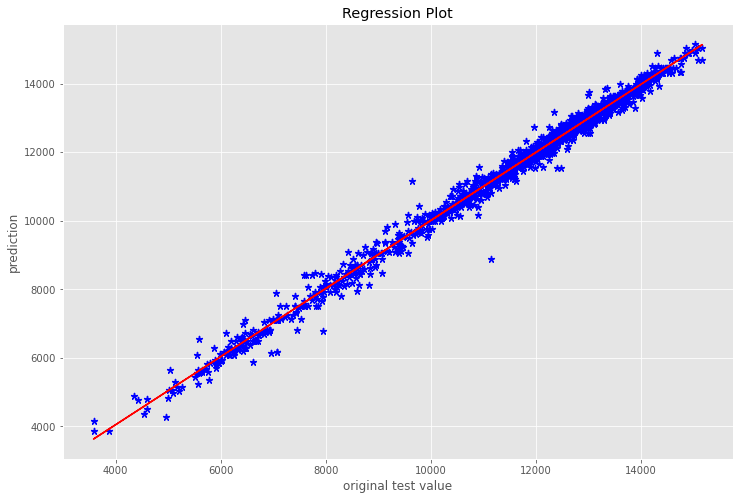

In [12]:
plt.style.use('ggplot')
plt.figure(figsize=(12, 8))
x, y = y_test, pred
plt.scatter(x, y, color='blue', marker=(5,2))
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='r')
plt.xlabel("original test value")
plt.ylabel("prediction")
plt.title("Regression Plot")